<a href="https://colab.research.google.com/github/yash11-web/html-self/blob/main/final_brain_tumor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Ctrl+Alt+Del v2**.0**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#to countimages with respective to class brain and healthy
ROOT_DIR="/content/drive/MyDrive/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Healthey', 17), ('Brain Tumor', 17)])

In [5]:
#70% for training
#15% for validation
#15% for testing
#train folder


In [6]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)
   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+p+"/"+dir)
     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(split*number_of_images[dir])-5),
                                replace=False):
       O=os.path.join(ROOT_DIR,dir,img)
       D=os.path.join("./"+p,dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{p} folder exists")

In [7]:
dataFolder("train",0.7)

train folder exists


In [8]:
dataFolder("val",0.15)

val folder exists


In [9]:
dataFolder("test",0.15)

test folder exists


In [10]:
#model building
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [11]:
#cnn model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 64)      20800     
                                                                 
 conv2d_3 (Conv2D)           (None, 218, 218, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 109, 109, 128)     0         
                                                        

In [12]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [13]:
#preparing data using a built in function called image data generator
def preprocessingImages1(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/225,horizontal_flip=True)#data augmentation
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [14]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 276 images belonging to 2 classes.


In [15]:
def preprocessingImages2(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(rescale=1/225)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [16]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 50 images belonging to 2 classes.


In [17]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 50 images belonging to 2 classes.


In [27]:
#early stopping and model check point
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')
#model checkpoint
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [28]:
#model training
hs= model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,validation_steps=16,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.6680


Epoch 1: val_accuracy improved from -inf to 0.76000, saving model to ./bestmodel.h5
8/8 [==============================] - 18s 2s/step - loss: 0.6046 - accuracy: 0.6680 - val_loss: 0.5499 - val_accuracy: 0.7600
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.7172

8/8 [==============================] - 6s 788ms/step - loss: 0.6145 - accuracy: 0.7172
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6352 - accuracy: 0.6516

8/8 [==============================] - 4s 520ms/step - loss: 0.6352 - accuracy: 0.6516
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5473 - accuracy: 0.7459

8/8 [==============================] - 6s 701ms/step - loss: 0.5473 - accuracy: 0.7459
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.5933 - accuracy: 0.7049

8/8 [==============================] - 6s 663ms/step - loss: 0.5933 - accuracy: 0.7049
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.7188

8/8 [==============================] - 6s 632ms/step - loss: 0.5975 - accuracy: 0.7188
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.5178 - accuracy: 0.7623

8/8 [==============================] - 5s 529ms/step - loss: 0.5178 - accuracy: 0.7623
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.7418

8/8 [==============================] - 6s 698ms/step - loss: 0.5203 - accuracy: 0.7418
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.5082 - accuracy: 0.7500

8/8 [==============================] - 5s 535ms/step - loss: 0.5082 - accuracy: 0.7500
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.7992

8/8 [==============================] - 5s 532ms/step - loss: 0.4832 - accuracy: 0.7992
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.7992

8/8 [==============================] - 6s 775ms/step - loss: 0.4444 - accuracy: 0.7992
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.7910

8/8 [==============================] - 5s 565ms/step - loss: 0.4805 - accuracy: 0.7910
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.7787

8/8 [==============================] - 6s 796ms/step - loss: 0.4265 - accuracy: 0.7787
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.4331 - accuracy: 0.8033

8/8 [==============================] - 5s 533ms/step - loss: 0.4331 - accuracy: 0.8033
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8197

8/8 [==============================] - 5s 547ms/step - loss: 0.4298 - accuracy: 0.8197
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8197

8/8 [==============================] - 6s 675ms/step - loss: 0.4251 - accuracy: 0.8197
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8361

8/8 [==============================] - 5s 529ms/step - loss: 0.3850 - accuracy: 0.8361
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.3375 - accuracy: 0.8402

8/8 [==============================] - 6s 701ms/step - loss: 0.3375 - accuracy: 0.8402
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.3764 - accuracy: 0.8361

8/8 [==============================] - 4s 517ms/step - loss: 0.3764 - accuracy: 0.8361
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8484

8/8 [==============================] - 6s 752ms/step - loss: 0.3505 - accuracy: 0.8484
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.3429 - accuracy: 0.8811

8/8 [==============================] - 5s 531ms/step - loss: 0.3429 - accuracy: 0.8811
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.3723 - accuracy: 0.8115

8/8 [==============================] - 5s 569ms/step - loss: 0.3723 - accuracy: 0.8115
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.3288 - accuracy: 0.8525

8/8 [==============================] - 6s 691ms/step - loss: 0.3288 - accuracy: 0.8525
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.3146 - accuracy: 0.8770

8/8 [==============================] - 4s 520ms/step - loss: 0.3146 - accuracy: 0.8770
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.8443

8/8 [==============================] - 5s 596ms/step - loss: 0.3138 - accuracy: 0.8443
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8566

8/8 [==============================] - 5s 599ms/step - loss: 0.3428 - accuracy: 0.8566
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.8934

8/8 [==============================] - 5s 537ms/step - loss: 0.2876 - accuracy: 0.8934
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.2989 - accuracy: 0.8607

8/8 [==============================] - 6s 681ms/step - loss: 0.2989 - accuracy: 0.8607
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.3204 - accuracy: 0.8320

8/8 [==============================] - 5s 532ms/step - loss: 0.3204 - accuracy: 0.8320
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.8607

8/8 [==============================] - 6s 749ms/step - loss: 0.2769 - accuracy: 0.8607


In [29]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

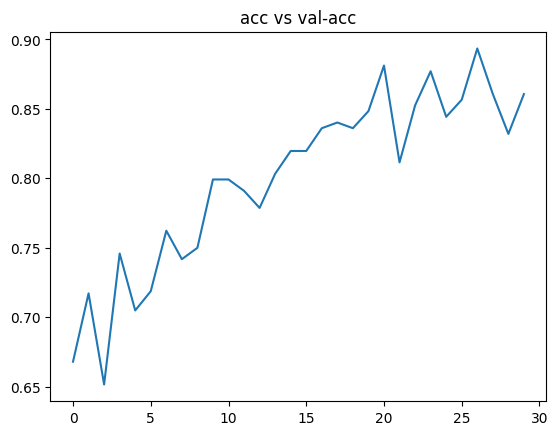

In [30]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("acc vs val-acc")
plt.show()

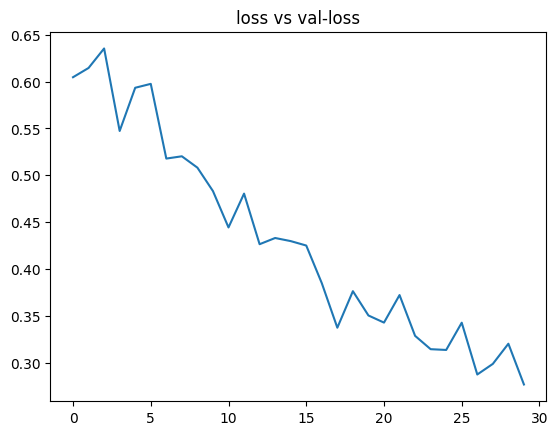

In [31]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs val-loss")
plt.show()

In [32]:
#model accurcy
#model accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [33]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")


the accuracy of our model is 75.99999904632568%


In [45]:
from keras.preprocessing.image import load_img,img_to_array

The MRI is not having tumor


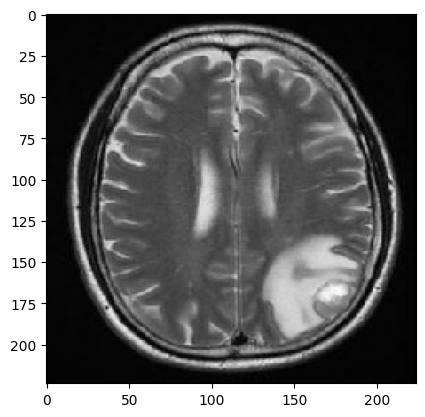

In [46]:
path="/content/test/Brain Tumor/y861.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict_generator(input_arr)[0][0]
pred
if pred==0:
  print("The MRI is having a Tumor")
else:
  print("The MRI is not having tumor")

In [36]:
train_data.class_indices


{'Brain Tumor': 0, 'Healthey': 1}